# 1.1 Парсинг данных 

Подключение библиотек

In [1]:
 pip install python-docx



Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install bs4




Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd
import json 
import docx
import requests
from bs4 import BeautifulSoup as bs
import glob
import codecs
from tqdm.auto import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

### Парсинг docx файла

In [4]:
# открытие файла
condidates_docx = docx.Document("Condidates.docx")

In [5]:
# парсинг данных
condidates = []
text_condidates_docx = condidates_docx.paragraphs
for con in text_condidates_docx:
    # проверка длинны параграфа, для избежания добавления пустых значений
    if len(con.text) > 0:
        condidates.append(con.text.strip().lower()) 
print(condidates)
print(len(condidates))

['здоровье.ру', 'проект по использованию технологий компьютерного зрения на базе искусственного интеллекта (ии) для анализа медицинских изображений', 'skillbox', 'gett', 'промобот', 'иннотех', 'cybersport.metaratings', 'mma.metaratings', 'goose gaming', 'esforce holding', 'vinci agency', 'гэллэри сервис', 'студия артемия лебедева', 'федерация креативных индустрий', 'метарейтинг', 'сбермаркет', 'balance platform', 'московская биржа', 'samsung electronics', 'нетология', 'дневник мэш', 'цифровое образование']

22


В docx документе предоставлены 22 номинанта, удалены лишние пробелы и приведен текст в нижний регистр, для стандартизации

### Парсинг json файлов

In [6]:
all_file = glob.glob(r"Data\*.json")
print(all_file)
print(len(all_file))

['Data\\Cybersport.Metaratings.json', 'Data\\ESforce Holding.json', 'Data\\Gett.json', 'Data\\Goose Gaming.json', 'Data\\MMA.Metaratings.json', 'Data\\skillbox.json', 'Data\\Vinci Agency.json', 'Data\\Гэллэри Сервис.json', 'Data\\Здоровье.ру.json', 'Data\\Иннотех.json', 'Data\\Проект по использованию технологий компьютерного зрения на базе искусственного интеллекта для анализа медицинских изображений.json', 'Data\\Промобот.json', 'Data\\Студия Артемия Лебедева.json', 'Data\\Федерация креативных индустрий.json']

14


In [7]:
norm_month = ["января","февраля","марта","апреля","мая","июня","июля","августа","сентября","октября","ноября","декабря"]
def norm_date(day, month, year=2021):
    try:
        day = int(day)
    except:
        day = 1
    if day < 10:
        day = "0{0}".format(day) 
        
    if month in norm_month:
        month = norm_month.index(month)+1
    else:
        month = 1
    if month < 10:
        month = "0{0}".format(month) 
    return int("{0}{1}{2}".format(year, month, day))

In [8]:
# парсинг данных компаний и статей 
about_condidates_json = {"name_company":[], "description":[], "activity":[], "rating":[]}
about_articles_json = {"name_company":[], "text":[], "date":[]}
brack_articles = []
brack_read = []
are_articles = []
nan_info = []
for file in all_file:
    # разбитие и срез строки для отделения имени компании
    name = file.split("\\")[-1][:-5].lower()
    try:
        # открытие файла
        with codecs.open(file,  "r", "utf_8_sig") as f:
            templates = json.load(f)
            # считывание информации о компаниях
            if templates["info"] != None:
                about_condidates_json["name_company"].append(name)
                about_condidates_json["description"].append(templates["info"]["about"])
                about_condidates_json["activity"].append(templates["info"]["industries"])
                about_condidates_json["rating"].append(templates["info"]["rate"])
            else:
                nan_info.append(name)
                
            if len(templates["refs"]) > 0:
                are_articles.append(name)
            # считывание информации о статьях   
            for art in templates["refs"]:
                try:
                    
                    about_articles_json["text"].append(art[0])
                    about_articles_json["date"].append(norm_date(art[1]["day"], art[1]["month"]))
                    about_articles_json["name_company"].append(name)
                except:
                    brack_articles.append(name) 
    except:
        brack_read.append(name)
    
print("Документы json, которые не считались: ", brack_read)
print("_________")
print("Нет информации о компаниях: ", nan_info)
print("_________")
print("Есть информация о кампании: ", about_condidates_json["name_company"])
print("_________")
print("У компании есть статьи: ", are_articles)
print("_________")
print("Статья не считана: ", brack_articles)
print("_________")
print("Количество статей", len(about_articles_json["name_company"]))

Документы json, которые не считались:  []

_________

Нет информации о компаниях:  ['cybersport.metaratings', 'esforce holding', 'gett', 'goose gaming', 'mma.metaratings', 'vinci agency', 'гэллэри сервис', 'здоровье.ру', 'проект по использованию технологий компьютерного зрения на базе искусственного интеллекта для анализа медицинских изображений', 'промобот', 'студия артемия лебедева', 'федерация креативных индустрий']

_________

Есть информация о кампании:  ['skillbox', 'иннотех']

_________

У компании есть статьи:  ['cybersport.metaratings', 'esforce holding', 'gett', 'goose gaming', 'skillbox', 'vinci agency', 'гэллэри сервис', 'здоровье.ру', 'иннотех', 'проект по использованию технологий компьютерного зрения на базе искусственного интеллекта для анализа медицинских изображений', 'промобот', 'студия артемия лебедева', 'федерация креативных индустрий']

_________

Статья не считана:  ['gett', 'здоровье.ру', 'здоровье.ру', 'студия артемия лебедева']

_________

Количество статей 111

In [9]:
compani_json_df = pd.DataFrame(about_condidates_json)
compani_json_df

,name_company,description,activity,rating
0,skillbox,Образовательная платформа Skillbox — один из л...,"[Веб-разработка, Дизайн и юзабилити, Реклама и...",113.82
1,иннотех,Мы мыслим инновациями\n\r\nГК «Иннотех» — это ...,"[Веб-разработка, Программное обеспечение, Веб-...",47.73


In [10]:
articles_json_df = pd.DataFrame(about_articles_json)
articles_json_df

,name_company,text,date
0,cybersport.metaratings,7 декабря состоялась церемония награждения лау...,20211208
1,esforce holding,7 декабря состоялась церемония награждения лау...,20211208
2,esforce holding,Из совместного исследования издателя компьютер...,20210729
3,esforce holding,По статистике The Esports Observer за I полови...,20210709
4,esforce holding,Компании SuperData Research и PayPal провели с...,20210411
...,...,...,...
1107,федерация креативных индустрий,"Привет, Хабр! Представляю вашему вниманию пере...",20210130
1108,федерация креативных индустрий,Источник\n«Умный человек не делает все ошибки ...,20210424
1109,федерация креативных индустрий,"Привет, Хабр! Сегодня мы решили поделиться с с...",20211012
1110,федерация креативных индустрий,"Привет! Меня зовут Никита Бокарев, я креативны...",20210904


Все 14 json прочитаны верно, у ряда компаний отсутствует информация, есть только у двух компаний. Статьи есть не у всех компаний, всего статей 1112, есть 4 статьи, которые не считались. Информацию о компаниях и их статьях нужно дополнить с веб ресурса Habr.

### Парсинг веб ресурса Habr 

In [11]:
# парсинг описание компаний 
def activity_condidates(soup_new):
    a = soup_new.find("a", class_="tm-company-snippet__title")
    url_condidate = "https://habr.com" + a["href"]
    page_condidate = requests.get(url_condidate)
    soup_condidate = bs(page_condidate.text, 'html.parser')
    div = soup_condidate.find("div", class_="tm-company-profile__categories")
    a1 = div.find_all("a")
    activity = []
    
    for i in a1:
        activity.append(i.text.strip().lower())
    activity = " ".join(activity)
    
    return activity

In [12]:
# парсинг компаний
about_condidates_habr = {"name_company":[], "description":[], "activity":[], "rating":[]}
for con in condidates:
    con.replace(" ", "20%")
    # создание ссылки
    url = "https://habr.com/ru/search/?q=" + con + "&target_type=companies&order=relevance"
    page = requests.get(url)
    soup = bs(page.text,  'html.parser')
    
    condidate_div = soup.find_all('em', class_='searched-item')
    # заполнение данных 
    if len(condidate_div) >0:
        if condidate_div[0].text.lower() == con:
            about_condidates_habr["name_company"].append(con)
            
            description_div = soup.find('div', class_='tm-company-snippet__description')
            about_condidates_habr["description"].append(description_div.text)
            
            about_condidates_habr["activity"].append(activity_condidates(soup))
            
            rating_span = soup.find('span', class_='tm-search-companies__score-counter tm-search-companies__score-counter_rating') 
            about_condidates_habr["rating"].append(rating_span.text.split()[1])


In [13]:
compani_habr_df = pd.DataFrame(about_condidates_habr)
compani_habr_df

,name_company,description,activity,rating
0,skillbox,Образовательная платформа Skillbox,веб-разработка дизайн и юзабилити реклама и ма...,119.84
1,иннотех,We help the businesses with digital transforma...,веб-разработка программное обеспечение веб-сер...,27.67
2,нетология,Меняем карьеру через образование,веб-разработка дизайн и юзабилити реклама и ма...,73.64


In [14]:
# парсинг статей
about_articles_habr = {"name_company":[], "text":[], "date":[]} 
for con in tqdm(condidates):
    if con not in are_articles:
        con = con.replace(" ", "%20")
        for i in range(1, 5):
            # создание ссылки
            uri_page = "https://habr.com/ru/search/page{1}/?q={0}&target_type=posts&order=relevance".format(con, i)
            page = requests.get(uri_page)
            soup = bs(page.text,  'html.parser')
            snippetsoup_name = soup.find_all('h2', class_='tm-title tm-title_h2')

            for i in snippetsoup_name:
                try:
                    uri_article = "https://habr.com" + str(i.a.get("href"))
                    page_article = requests.get(uri_article)
                   
                    soup_article = bs(page_article.text,  'html.parser')
            
                    
                    date = soup_article.find('span', class_='tm-article-datetime-published')
                    # две версии верстки, отбор данных статей
                    try:
                        note = soup_article.find('div', class_='article-formatted-body article-formatted-body article-formatted-body_version-1')
                        about_articles_habr["text"].append(note.div.text.replace("\n", " ").replace("\r", " ").replace("  ", " ").replace("\xa0", " "))
                        about_articles_habr["name_company"].append(con.replace("%20", " "))
                        about_articles_habr["date"].append(date.time.get("title").split(",")[0])
                    except:
                        try:
                            note = soup_article.find('div', class_='article-formatted-body article-formatted-body article-formatted-body_version-2')
                            about_articles_habr["text"].append(note.div.text.replace("\n", " ").replace("\r", " ").replace("  ", " ").replace("\xa0", " "))
                            about_articles_habr["name_company"].append(con.replace("%20", " "))
                            about_articles_habr["date"].append(date.time.get("title").split(",")[0])
                        except:
                            print(uri_article)
                except:
                    print(uri_article)
               
print("_________")
print("Количество статей", len(about_articles_habr["name_company"]))

  0%|          | 0/22 [00:00<?, ?it/s]

https://habr.com/ru/companies/epam_systems/news/563500/

https://habr.com/ru/companies/2035_university/news/561404/

_________

Количество статей 575


In [15]:
articles_habr_df = pd.DataFrame(about_articles_habr)
articles_habr_df

,name_company,text,date
0,проект по использованию технологий компьютерно...,"При содействии: Ed Burns Nicole Laskowski, ст...",2023-01-13
1,проект по использованию технологий компьютерно...,Применение искусственного интеллекта в медицин...,2018-07-09
2,проект по использованию технологий компьютерно...,Немного о названии статьиВ названии статьи мы ...,2023-04-28
3,проект по использованию технологий компьютерно...,"Предположим, вы хотите создать приложение, кот...",2016-10-20
4,проект по использованию технологий компьютерно...,"Никто не понимает, как работают самые передовы...",2017-05-07
...,...,...,...
570,цифровое образование,На так называемые «цифровые кафедры» вузов был...,2022-09-26
571,цифровое образование,"Меня дважды спрашивали о цифровых деньгах, кот...",2023-01-27
572,цифровое образование,"Приветствую, хабраюзер! Похоже, на Хабре новая...",2010-04-07
573,цифровое образование,"Многие компании могут уйти с рынка, а сами рын...",2015-06-30


Получены данные компании с сайта, две (skillbox, иннотех) из них совпадают с уже имеющимися. Считаю, что с сайта более актуальные данные. Получили статьи тех компаний, что не представлены в json файлах. 

### Объединение dataframe

In [16]:
# конкатенация dataframe
articles = pd.concat([articles_json_df, articles_habr_df], ignore_index=True)
articles

,name_company,text,date
0,cybersport.metaratings,7 декабря состоялась церемония награждения лау...,20211208
1,esforce holding,7 декабря состоялась церемония награждения лау...,20211208
2,esforce holding,Из совместного исследования издателя компьютер...,20210729
3,esforce holding,По статистике The Esports Observer за I полови...,20210709
4,esforce holding,Компании SuperData Research и PayPal провели с...,20210411
...,...,...,...
1682,цифровое образование,На так называемые «цифровые кафедры» вузов был...,2022-09-26
1683,цифровое образование,"Меня дважды спрашивали о цифровых деньгах, кот...",2023-01-27
1684,цифровое образование,"Приветствую, хабраюзер! Похоже, на Хабре новая...",2010-04-07
1685,цифровое образование,"Многие компании могут уйти с рынка, а сами рын...",2015-06-30


In [17]:
# соединение dataframe
articles_full = articles.merge(compani_habr_df ,how='left', on="name_company")
articles_full

,name_company,text,date,description,activity,rating
0,cybersport.metaratings,7 декабря состоялась церемония награждения лау...,20211208,NaN,NaN,NaN
1,esforce holding,7 декабря состоялась церемония награждения лау...,20211208,NaN,NaN,NaN
2,esforce holding,Из совместного исследования издателя компьютер...,20210729,NaN,NaN,NaN
3,esforce holding,По статистике The Esports Observer за I полови...,20210709,NaN,NaN,NaN
4,esforce holding,Компании SuperData Research и PayPal провели с...,20210411,NaN,NaN,NaN
...,...,...,...,...,...,...
1682,цифровое образование,На так называемые «цифровые кафедры» вузов был...,2022-09-26,NaN,NaN,NaN
1683,цифровое образование,"Меня дважды спрашивали о цифровых деньгах, кот...",2023-01-27,NaN,NaN,NaN
1684,цифровое образование,"Приветствую, хабраюзер! Похоже, на Хабре новая...",2010-04-07,NaN,NaN,NaN
1685,цифровое образование,"Многие компании могут уйти с рынка, а сами рын...",2015-06-30,NaN,NaN,NaN


In [18]:
articles_full[articles_full["name_company"] == "skillbox"]

,name_company,text,date,description,activity,rating
146,skillbox,Сравниваем традиционный способ извлечения знач...,20210329,Образовательная платформа Skillbox,веб-разработка дизайн и юзабилити реклама и ма...,119.84
147,skillbox,Издание «Ведомости» поговорило с участниками р...,20210328,Образовательная платформа Skillbox,веб-разработка дизайн и юзабилити реклама и ма...,119.84
148,skillbox,"Александр Нозик, физик и программист, руководи...",20210314,Образовательная платформа Skillbox,веб-разработка дизайн и юзабилити реклама и ма...,119.84
149,skillbox,Всем привет! В конце 21-го года состоялся пер...,20210303,Образовательная платформа Skillbox,веб-разработка дизайн и юзабилити реклама и ма...,119.84
150,skillbox,1 марта VK запустила информационную кампанию в...,20210301,Образовательная платформа Skillbox,веб-разработка дизайн и юзабилити реклама и ма...,119.84
...,...,...,...,...,...,...
422,skillbox,В идеальном варианте пользователь приложения и...,20210618,Образовательная платформа Skillbox,веб-разработка дизайн и юзабилити реклама и ма...,119.84
423,skillbox,Любые собеседования специфичны. Они отличаются...,20210531,Образовательная платформа Skillbox,веб-разработка дизайн и юзабилити реклама и ма...,119.84
424,skillbox,"То, что сегодня стало большим и зрелым рынком ...",20210521,Образовательная платформа Skillbox,веб-разработка дизайн и юзабилити реклама и ма...,119.84
425,skillbox,Дайджест собирает свежие статьи по дизайну инт...,20210507,Образовательная платформа Skillbox,веб-разработка дизайн и юзабилити реклама и ма...,119.84


Получили dataframe 1686 × 6, есть пустые значения, текст не обработан. 

**Описание признаков** 

   - **name_company** - компания номинант
   - **text** - тест статьи
   - **date** - дата публикации статьи
   - **description** - описание компании
   - **activity** - сфера деятельности компании 
   - **rating** - рейтинг компании

In [19]:
FILE_NAME_ONE = "статьи.csv"
import pandas as pd

In [20]:
articles_full.to_csv(FILE_NAME_ONE, encoding="utf-8-sig", index=False)

In [21]:
# articles_full = pd.read_csv(FILE_NAME_ONE)
articles_full

,name_company,text,date,description,activity,rating
0,cybersport.metaratings,7 декабря состоялась церемония награждения лау...,20211208,NaN,NaN,NaN
1,esforce holding,7 декабря состоялась церемония награждения лау...,20211208,NaN,NaN,NaN
2,esforce holding,Из совместного исследования издателя компьютер...,20210729,NaN,NaN,NaN
3,esforce holding,По статистике The Esports Observer за I полови...,20210709,NaN,NaN,NaN
4,esforce holding,Компании SuperData Research и PayPal провели с...,20210411,NaN,NaN,NaN
...,...,...,...,...,...,...
1682,цифровое образование,На так называемые «цифровые кафедры» вузов был...,2022-09-26,NaN,NaN,NaN
1683,цифровое образование,"Меня дважды спрашивали о цифровых деньгах, кот...",2023-01-27,NaN,NaN,NaN
1684,цифровое образование,"Приветствую, хабраюзер! Похоже, на Хабре новая...",2010-04-07,NaN,NaN,NaN
1685,цифровое образование,"Многие компании могут уйти с рынка, а сами рын...",2015-06-30,NaN,NaN,NaN


# 1.2 Формирование структуры набора данных

In [22]:
articles_full.info()

<class 'pandas.core.frame.DataFrame'>

Int64Index: 1687 entries, 0 to 1686

Data columns (total 6 columns):

 #   Column        Non-Null Count  Dtype 

---  ------        --------------  ----- 

 0   name_company  1687 non-null   object

 1   text          1687 non-null   object

 2   date          1687 non-null   object

 3   description   373 non-null    object

 4   activity      373 non-null    object

 5   rating        373 non-null    object

dtypes: object(6)

memory usage: 92.3+ KB


   - **name_company** - строковый тип данных, не имеет пропусков, является основным признаком, определяющий компанию номинанта.
   - **text** - является одним из основных признаков так, как определяет то, о чем пишет компания.
   - **date** - не является основным признаком, может отобразить только разницу в дате публикации статей, что не сильно коррелирует с номинированными на премию
   - **description** - не является основным признаком, зачастую не несет рекламный характер, практически ни как не отражает деятельность компании и имеет много пропусков
   - **activity** - не является основным признаком, но описывает сферу деятельности компании, что поможет выявить наиболее подходящую номинацию 
   - **rating** - не является основным признаком, отражает положения компании, в топе компаний, что не поможет номинировать их, много пропусков


In [23]:
df = pd.DataFrame(articles_full.value_counts("name_company"))
df

,0
name_company,
здоровье.ру,398
skillbox,281
студия артемия лебедева,200
gett,134
balance platform,80
сбермаркет,80
samsung electronics,80
нетология,80
дневник мэш,80


Получен dataframe 1672 × 3, новые параметры не добавлены. Все 3 признака имеют строковый тип, написаны по большой части на русском языке

In [25]:
for con in condidates:
    if con not in articles_full["name_company"].unique():
        print("У компании нет статей ни на Habr, ни в Json:", con)

У компании нет статей ни на Habr, ни в Json: mma.metaratings


# 1.3 Предварительная обработка текстовых данных 

### Предварительный разведочный анализ

In [26]:
articles_full.head(5)

,name_company,text,date,description,activity,rating
0,cybersport.metaratings,7 декабря состоялась церемония награждения лау...,20211208,NaN,NaN,NaN
1,esforce holding,7 декабря состоялась церемония награждения лау...,20211208,NaN,NaN,NaN
2,esforce holding,Из совместного исследования издателя компьютер...,20210729,NaN,NaN,NaN
3,esforce holding,По статистике The Esports Observer за I полови...,20210709,NaN,NaN,NaN
4,esforce holding,Компании SuperData Research и PayPal провели с...,20210411,NaN,NaN,NaN


В столбцах: «description», «activity», «rating» видны пропуски

In [27]:
for col in articles_full.columns:
    print(f'Процент пропусков в колонке {col} = {articles_full[col].isna().sum() / articles_full.shape[0] * 100: .2f}')

Процент пропусков в колонке name_company =  0.00

Процент пропусков в колонке text =  0.00

Процент пропусков в колонке date =  0.00

Процент пропусков в колонке description =  77.89

Процент пропусков в колонке activity =  77.89

Процент пропусков в колонке rating =  77.89


<Axes: >

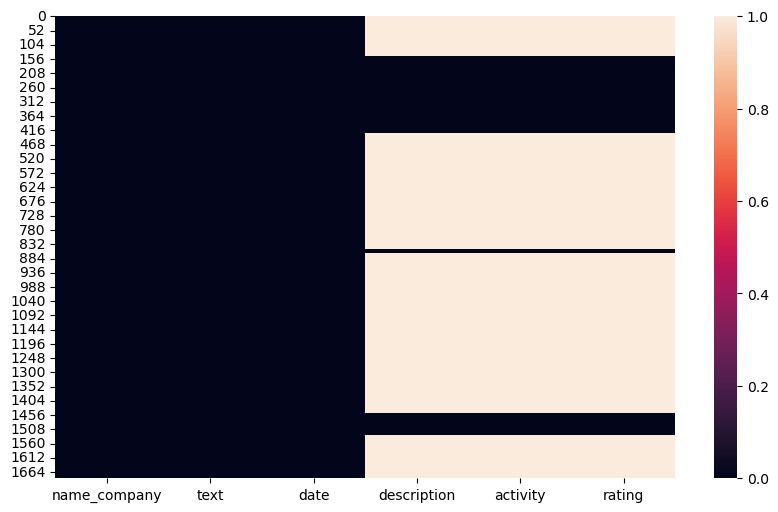

In [28]:
plt.figure(figsize=(10,6))
sns.heatmap(articles_full.isna())

In [29]:
articles_full.info()

<class 'pandas.core.frame.DataFrame'>

Int64Index: 1687 entries, 0 to 1686

Data columns (total 6 columns):

 #   Column        Non-Null Count  Dtype 

---  ------        --------------  ----- 

 0   name_company  1687 non-null   object

 1   text          1687 non-null   object

 2   date          1687 non-null   object

 3   description   373 non-null    object

 4   activity      373 non-null    object

 5   rating        373 non-null    object

dtypes: object(6)

memory usage: 92.3+ KB


In [30]:
articles_full.describe()

,name_company,text,date,description,activity,rating
count,1687,1687,1687,373,373,373
unique,22,1660,850,3,2,3
top,здоровье.ру,7 декабря состоялась церемония награждения лау...,20211208,Образовательная платформа Skillbox,веб-разработка дизайн и юзабилити реклама и ма...,119.84
freq,398,13,16,281,361,281


Большая часть данных строкового типа 

In [31]:
articles_full.name_company.unique()

array(['cybersport.metaratings', 'esforce holding', 'gett',
       'goose gaming', 'skillbox', 'vinci agency', 'гэллэри сервис',
       'здоровье.ру', 'иннотех',
       'проект по использованию технологий компьютерного зрения на базе искусственного интеллекта для анализа медицинских изображений',
       'промобот', 'студия артемия лебедева',
       'федерация креативных индустрий',
       'проект по использованию технологий компьютерного зрения на базе искусственного интеллекта (ии) для анализа медицинских изображений',
       'метарейтинг', 'сбермаркет', 'balance platform',
       'московская биржа', 'samsung electronics', 'нетология',
       'дневник мэш', 'цифровое образование'], dtype=object)

Столбец «name_company» содержит текст на русском и английском языках 

In [32]:
articles_full["text"][0]

'7 декабря состоялась церемония награждения лауреатов премии Рунета 2021 года. В этом году на премию было подано 1097 работ за вклад в развитие российского сегмента сети интернет в девять основных и четыре специальные номинации. Финалистами конкурса в каждой номинации стали по 10 организаций. \n\r\nЛауреатами премии Рунета 2021 стали 52 компании и 3 персоны. Причем раньше организаторы (Российская ассоциация электронных коммуникаций — РАЭК) награждали несколько лучших представителей в каждой из номинации, по мнению экспертного сообщества. В этом году они обратились к помощи искусственного интеллекта и добавили еще одного лауреата, который выбирался именно по мнению ИИ. \n\r\nНоминация «Государство и Общество», победители:\n\n\n Благотворительный фонд «Подари жизнь»;\n АНО «Диалог»;\n Правительство Москвы, проект Цифровая экосистема Москвы;\n ФНС России;\n Программа «Пушкинская карта» / АО «Почта Банк».\n\r\nНоминация «СМИ и Массовые коммуникации»: \n\n\n Телеканал 360;\n Медиахолдинг In

Столбец «text» содержит текст на русском и английском языках, числа, знаки пунктуации, спец символы

In [33]:
articles_full.date.unique()

array([20211208, 20210729, 20210709, 20210411, 20210329, 20210311,
       20210222, 20210221, 20210207, 20210203, 20210202, 20211224,
       20211220, 20211209, 20211027, 20211001, 20210629, 20210617,
       20210224, 20211111, 20211029, 20211017, 20210602, 20210507,
       20210430, 20210313, 20210303, 20210227, 20210205, 20210124,
       20210117, 20211219, 20211203, 20210926, 20210925, 20210920,
       20210917, 20210916, 20210913, 20210911, 20210910, 20210905,
       20210830, 20210821, 20210809, 20210702, 20210625, 20210624,
       20210621, 20210515, 20210410, 20211223, 20211221, 20211123,
       20211031, 20211008, 20211004, 20210928, 20210919, 20210820,
       20210819, 20210723, 20210704, 20210510, 20210504, 20210426,
       20210423, 20210419, 20210418, 20210405, 20210116, 20211117,
       20211109, 20211015, 20210622, 20210513, 20210421, 20210628,
       20210420, 20210412, 20210406, 20210324, 20210317, 20210315,
       20210225, 20210209, 20210201, 20210126, 20210113, 20211

In [34]:
len(articles_full.date.unique())

850

Столбец «date» содержит дату разных образцов: числовой и строковый 

In [35]:
articles_full.rating.unique()

array([nan, '119.84', '27.67', '73.64'], dtype=object)

Столбец «name_company» числовые значения и пропуски 

In [36]:
articles_full.activity.unique()

array([nan, 'веб-разработка дизайн и юзабилити реклама и маркетинг',
       'веб-разработка программное обеспечение веб-сервисы'], dtype=object)

Столбец «activity» содержит текст на русском со знаками пунктуации и пустые значения 

In [37]:
articles_full.description.unique()

array([nan, 'Образовательная платформа Skillbox',
       'We help the businesses with digital transformation',
       'Меняем карьеру через образование'], dtype=object)

Столбец «description» содержит текст на русском и английском языках со знаками пунктуации и пустые значения 

Объем и разнообразие текстовых данных: Задача классификации текста для премии "Рунета" предполагает работу с большим объемом и разнообразием текстовых данных. Для обработки такого объема информации необходимо использовать эффективные методы предварительной обработки текста, чтобы извлечь значимые признаки и снизить размерность данных. Таким образом, мы можем применить методы, такие как токенизация, удаление стоп-слов, нормализация текста (лемматизация или стемминг) и векторизация слов.

Перед тем, как набор данных можно будет использовать для создания модели машинного обучения, необходимо его подготовить. Предварительная обработка исходных данных играет важную роль для построения качественной модели.
- name_company + 
     - не трогаем + 
     
     
- text
     1) Привести текст в нижний регистр +
     2) Удалить спец символы +
     3) Удалить числа +
     3) Удалить стоп слова +
     4) Выполнить Tокенизация
     5) Выполнить Лемматизацию и выделение значимых частей речи

- date
    1) Преобразовать строки с числа + 
    2) Отсечь строки с не нужные значениями + 

- rating 
    1) Заполнить пустые значения + 

- activity 
    1) Заполнить пустые значения + 
    2) Удалить пунктуацию символы +
    3) Выполнить Tокенизация 
    4) Выполнить Лемматизацию

- description 
    1) Заполнить пустые значения + 
    2) Удалить пунктуацию символы + 
    3) Выполнить Tокенизация
    4) Выполнить Лемматизацию

Проверить результат, при необходимости выполнить дополнительные корректировки

### Замена пустых значений

In [38]:
for col in articles_full.columns:
    print(f'Процент пропусков в колонке {col} = {articles_full[col].isna().sum() / articles_full.shape[0] * 100: .2f}')

Процент пропусков в колонке name_company =  0.00

Процент пропусков в колонке text =  0.00

Процент пропусков в колонке date =  0.00

Процент пропусков в колонке description =  77.89

Процент пропусков в колонке activity =  77.89

Процент пропусков в колонке rating =  77.89


**description**, **activity**, **rating** содержат много пустых значений, которые нужно заменить, для последующий классификации

In [39]:
# Заменим пустые значения в признаках description и activity заглушкой. 
# Заглушка подобрана по принципу меньше слов и встретится встретиться в тексте
articles_full['description'].fillna("пусто", inplace = True)
articles_full['activity'].fillna("пусто", inplace = True)

In [40]:
# Заменим пустые значения в признаке rating заглушкой. 
# Там числовой признак, заменим числом
articles_full['rating'].fillna(0, inplace = True)

In [41]:
for col in articles_full.columns:
    print(f'Процент пропусков в колонке {col} = {articles_full[col].isna().sum() / articles_full.shape[0] * 100: .2f}')
print("______")
print("Заменено в description:", articles_full[articles_full['description']=="пусто"]['description'].count())
print("______")
print("Заменено в activity:", articles_full[articles_full['activity']=="пусто"]['activity'].count())
print("______")
print("Заменено в rating:", articles_full[articles_full['rating']==0]['rating'].count())

Процент пропусков в колонке name_company =  0.00

Процент пропусков в колонке text =  0.00

Процент пропусков в колонке date =  0.00

Процент пропусков в колонке description =  0.00

Процент пропусков в колонке activity =  0.00

Процент пропусков в колонке rating =  0.00

______

Заменено в description: 1314

______

Заменено в activity: 1314

______

Заменено в rating: 1314


###  Удаление стоп-слов, пунктуации, спецсимволов.

In [42]:
import re
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to

[nltk_data]     C:\Users\nudan\AppData\Roaming\nltk_data...

[nltk_data]   Package stopwords is already up-to-date!

[nltk_data] Downloading package punkt to

[nltk_data]     C:\Users\nudan\AppData\Roaming\nltk_data...

[nltk_data]   Package punkt is already up-to-date!


True

In [43]:
stopwords_ru = stopwords.words("russian")
stopwords_ru.extend(["который", "которая","которое","которые","которого","которому"])

In [44]:
def removal_excess(text):
    text = text.lower()
    text = text.replace("\n", " ")
    text = text.replace("\r", " ")
    text = re.sub('ё','е', text)
    text = re.sub('й','и', text)
    text = re.sub(r"[^а-яa-z\s]+", "", text)
    text = ' '.join([i for i in text.split() if len(i) >3 and  i not in stopwords_ru])# удаление стоп слов 
    text = re.sub(" +", " ", text)
    return text

In [45]:
for i in tqdm(range(len(articles_full))):
    articles_full.at[i, "text"] = removal_excess(articles_full["text"][i])
    articles_full.at[i, "activity"] = removal_excess(articles_full["activity"][i])
    articles_full.at[i, "description"] = removal_excess(articles_full["description"][i])

  0%|          | 0/1687 [00:00<?, ?it/s]

In [46]:
articles_full

,name_company,text,date,description,activity,rating
0,cybersport.metaratings,декабря состоялась церемония награждения лауре...,20211208,пусто,пусто,0
1,esforce holding,декабря состоялась церемония награждения лауре...,20211208,пусто,пусто,0
2,esforce holding,совместного исследования издателя компьютерных...,20210729,пусто,пусто,0
3,esforce holding,статистике esports observer половину года впер...,20210709,пусто,пусто,0
4,esforce holding,компании superdata research paypal провели сов...,20210411,пусто,пусто,0
...,...,...,...,...,...,...
1682,цифровое образование,называемые цифровые кафедры вузов подано тысяч...,2022-09-26,пусто,пусто,0
1683,цифровое образование,дважды спрашивали цифровых деньгах якобы гряду...,2023-01-27,пусто,пусто,0
1684,цифровое образование,приветствую хабраюзер похоже хабре новая недел...,2010-04-07,пусто,пусто,0
1685,цифровое образование,многие компании могут уити рынка сами рынки по...,2015-06-30,пусто,пусто,0


Удалены в "text", "description" и "activity"  спец символы - пунктуация, символы переноса и табуляции, стоп слова и слова длинной менее 3 символов, лишние пробелы, что очистило данные, для дальнейшей обработки.

### Форматирование даты

In [47]:
def format_date(date):
    date = str(date)
    date = date.replace("-", "")
    date = re.sub(" +", " ", date)
    return int(date)

In [48]:
for i in tqdm(range(len(articles_full))):
    articles_full.at[i, "date"] = format_date(articles_full["date"][i])

  0%|          | 0/1687 [00:00<?, ?it/s]

In [49]:
articles_full["date"] = articles_full["date"].astype('int') 

In [50]:
articles_full.info()

<class 'pandas.core.frame.DataFrame'>

Int64Index: 1687 entries, 0 to 1686

Data columns (total 6 columns):

 #   Column        Non-Null Count  Dtype 

---  ------        --------------  ----- 

 0   name_company  1687 non-null   object

 1   text          1687 non-null   object

 2   date          1687 non-null   int32 

 3   description   1687 non-null   object

 4   activity      1687 non-null   object

 5   rating        1687 non-null   object

dtypes: int32(1), object(5)

memory usage: 150.2+ KB


### Фильтрация по дате

In [51]:
articles_full = articles_full[(articles_full["date"] > 20210000) & (articles_full["date"] < 20220000)]

In [52]:
articles_full.reset_index(drop= True , inplace= True )
articles_full

,name_company,text,date,description,activity,rating
0,cybersport.metaratings,декабря состоялась церемония награждения лауре...,20211208,пусто,пусто,0
1,esforce holding,декабря состоялась церемония награждения лауре...,20211208,пусто,пусто,0
2,esforce holding,совместного исследования издателя компьютерных...,20210729,пусто,пусто,0
3,esforce holding,статистике esports observer половину года впер...,20210709,пусто,пусто,0
4,esforce holding,компании superdata research paypal провели сов...,20210411,пусто,пусто,0
...,...,...,...,...,...,...
1212,цифровое образование,министерство труда социальнои защиты россии оп...,20210811,пусто,пусто,0
1213,цифровое образование,министр просвещения сергеи кравцов докладывает...,20210116,пусто,пусто,0
1214,цифровое образование,великии уравнитель однои команде могут работат...,20211220,пусто,пусто,0
1215,цифровое образование,сегодня взял руки книжку эндрю таненбаума архи...,20211114,пусто,пусто,0


In [53]:
articles_full.date.unique()

array([20211208, 20210729, 20210709, 20210411, 20210329, 20210311,
       20210222, 20210221, 20210207, 20210203, 20210202, 20211224,
       20211220, 20211209, 20211027, 20211001, 20210629, 20210617,
       20210224, 20211111, 20211029, 20211017, 20210602, 20210507,
       20210430, 20210313, 20210303, 20210227, 20210205, 20210124,
       20210117, 20211219, 20211203, 20210926, 20210925, 20210920,
       20210917, 20210916, 20210913, 20210911, 20210910, 20210905,
       20210830, 20210821, 20210809, 20210702, 20210625, 20210624,
       20210621, 20210515, 20210410, 20211223, 20211221, 20211123,
       20211031, 20211008, 20211004, 20210928, 20210919, 20210820,
       20210819, 20210723, 20210704, 20210510, 20210504, 20210426,
       20210423, 20210419, 20210418, 20210405, 20210116, 20211117,
       20211109, 20211015, 20210622, 20210513, 20210421, 20210628,
       20210420, 20210412, 20210406, 20210324, 20210317, 20210315,
       20210225, 20210209, 20210201, 20210126, 20210113, 20211

###  Tокенизация

Токенизация – это процесс разделения предложений на слова-компонентыё

В модуле nltk.tokenize есть множество классов токенизаторов и функции nltk.word_tokenize на самом деле являются надстройкой

TreebankWordTokenizer
Класс используется для разделения предложений на слова и вызывается функции nltk.word_tokenize.
Он предполагает, что текст уже был разделён на предложения и выполняет следующие шаги:

- Разделяет стандартные сокращения, например don't -> do n't and they'll -> they 'll
- Рассматривает большинство знаков препинания как отдельные токены
- Отделяет запятые и одинарные кавычки, если за ними следует пробел
- Отделяет точки в конце предложений

word_tokenize выбран потому/ что является самым простым, разбивая текст на слова и наиболее подходит к нашей задаче.  

In [54]:
from nltk.tokenize import word_tokenize

In [55]:
def tokenize(text):
    return word_tokenize(text)

In [56]:
for i in tqdm(range(len(articles_full))):
    articles_full.at[i, "text"] = tokenize(articles_full["text"][i])
    articles_full.at[i, "activity"] = tokenize(articles_full["activity"][i])
    articles_full.at[i, "description"] = tokenize(articles_full["description"][i])

  0%|          | 0/1217 [00:00<?, ?it/s]

In [57]:
articles_full

,name_company,text,date,description,activity,rating
0,cybersport.metaratings,"[декабря, состоялась, церемония, награждения, ...",20211208,[пусто],[пусто],0
1,esforce holding,"[декабря, состоялась, церемония, награждения, ...",20211208,[пусто],[пусто],0
2,esforce holding,"[совместного, исследования, издателя, компьюте...",20210729,[пусто],[пусто],0
3,esforce holding,"[статистике, esports, observer, половину, года...",20210709,[пусто],[пусто],0
4,esforce holding,"[компании, superdata, research, paypal, провел...",20210411,[пусто],[пусто],0
...,...,...,...,...,...,...
1212,цифровое образование,"[министерство, труда, социальнои, защиты, росс...",20210811,[пусто],[пусто],0
1213,цифровое образование,"[министр, просвещения, сергеи, кравцов, доклад...",20210116,[пусто],[пусто],0
1214,цифровое образование,"[великии, уравнитель, однои, команде, могут, р...",20211220,[пусто],[пусто],0
1215,цифровое образование,"[сегодня, взял, руки, книжку, эндрю, таненбаум...",20211114,[пусто],[пусто],0


Tокенизация в "text", "description" и "activity" разбиение для дальнейшей обработки.

### Лемматизация и выделение значимых частей речи

Лемматизация - основная идея в приведении слова к словарной форме.

Выбран pymorphy2 потому что разработан российской компанией, вследствие этого как нельзя лучше лемматизирует русские текста

Воспользуемся готовым средством маркировки из NLTK PerceptronTagger()


In [58]:
pip install pymorphy2





Note: you may need to restart the kernel to use updated packages.


In [59]:
import pymorphy2

import nltk
from nltk.tag.perceptron import PerceptronTagger
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to

[nltk_data]     C:\Users\nudan\AppData\Roaming\nltk_data...

[nltk_data]   Package averaged_perceptron_tagger is already up-to-

[nltk_data]       date!


True

In [60]:
morph = pymorphy2.MorphAnalyzer()

In [61]:
def lemmatizer(text):
    return [morph.parse(i)[0].normal_form for i in text]

In [62]:
def translate_pos_pymorphy2(pos):
    pos_dict = {
        'ADJF': 'Имя прилагательное (полное)',
        'ADJS': 'Имя прилагательное (краткое)',
        'ADVB': 'Наречие',
        'COMP': 'Сравнительная степень',
        'CONJ': 'Союз',
        'GRND': 'Деепричастие',
        'INFN': 'Инфинитив',
        'INTJ': 'Междометие',
        'NOUN': 'Имя существительное',
        'NPRO': 'Местоимение-существительное',
        'NUMR': 'Числительное',
        'PRED': 'Предикатив',
        'PREP': 'Предлог',
        'PRTF': 'Причастие (полное)',
        'PRTS': 'Причастие (краткое)',
        'VERB': 'Глагол'
    }
    return pos_dict.get(pos, 'Неизвестно')

In [63]:
def perceptron(words):
    words = set(words)
    tagged_words = [(word, morph.parse(word)[0].tag.POS) for word in words]

    tagged_words_new = []
    for word, pos in tagged_words:
        type_ = (word, translate_pos_pymorphy2(pos))
        tagged_words_new.append(type_)
        
    return tagged_words_new


In [64]:
for i in tqdm(range(len(articles_full))):
    articles_full.at[i, "text"] = lemmatizer(articles_full["text"][i])
    articles_full.at[i, "activity"] = lemmatizer(articles_full["activity"][i])
    articles_full.at[i, "description"] = lemmatizer(articles_full["description"][i])

  0%|          | 0/1217 [00:00<?, ?it/s]

In [65]:
per = {"part_speech":[]}
for i in tqdm(range(len(articles_full))):
    per["part_speech"].append(perceptron(articles_full["text"][i]))

  0%|          | 0/1217 [00:00<?, ?it/s]

In [66]:
articles_full["part_speech"] = per["part_speech"]
articles_full

C:\Users\nudan\AppData\Local\Temp\ipykernel_19748\316023650.py:1: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  articles_full["part_speech"] = per["part_speech"]


,name_company,text,date,description,activity,rating,part_speech
0,cybersport.metaratings,"[декабрь, состояться, церемония, награждение, ...",20211208,[пусто],[пусто],0,"[(именно, Неизвестно), (vinci, Неизвестно), (м..."
1,esforce holding,"[декабрь, состояться, церемония, награждение, ...",20211208,[пусто],[пусто],0,"[(именно, Неизвестно), (vinci, Неизвестно), (м..."
2,esforce holding,"[совместный, исследование, издатель, компьютер...",20210729,[пусто],[пусто],0,"[(другой, Имя прилагательное (полное)), (склон..."
3,esforce holding,"[статистика, esports, observer, половина, год,...",20210709,[пусто],[пусто],0,"[(тактический, Имя прилагательное (полное)), (..."
4,esforce holding,"[компания, superdata, research, paypal, провес...",20210411,[пусто],[пусто],0,"[(большинство, Имя существительное), (именно, ..."
...,...,...,...,...,...,...,...
1212,цифровое образование,"[министерство, труд, социальноить, защита, рос...",20210811,[пусто],[пусто],0,"[(сбор, Имя существительное), (рынок, Имя суще..."
1213,цифровое образование,"[министр, просвещение, сергей, кравцов, доклад...",20210116,[пусто],[пусто],0,"[(пока, Наречие), (reactjs, Неизвестно), (дела..."
1214,цифровое образование,"[великия, уравнитель, одной, команда, мочь, ра...",20211220,[пусто],[пусто],0,"[(лабораторный, Имя прилагательное (полное)), ..."
1215,цифровое образование,"[сегодня, взять, рука, книжка, эндрю, таненбау...",20211114,[пусто],[пусто],0,"[(именно, Неизвестно), (упомянуть, Инфинитив),..."


### Проверка результатов 

In [67]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

count_vectorizer = CountVectorizer(ngram_range=(1, 3))

bag_of_words = count_vectorizer.fit_transform([" ".join(articles_full["text"][44])])
feature_names = count_vectorizer.get_feature_names_out()
uniq_and_fifa = dict(zip(feature_names, bag_of_words.toarray()[0]))
uniq_and_fifa = dict(sorted(uniq_and_fifa.items(), key=lambda item: -item[1]))
uniq_and_fifa

{'shopify': 22,
 'магазин': 15,
 'rails': 14,
 'работать': 14,
 'проблема': 11,
 'компания': 10,
 'один': 10,
 'свой': 10,
 'такой': 10,
 'ruby': 9,
 'больший': 8,
 'делать': 8,
 'другой': 8,
 'заниматься': 8,
 'который': 8,
 'шард': 8,
 'бизнес': 7,
 'нужно': 7,
 'человек': 7,
 'людея': 6,
 'например': 6,
 'просто': 6,
 'решить': 6,
 'чтоть': 6,
 'шардинга': 6,
 'база': 5,
 'время': 5,
 'данные': 5,
 'именно': 5,
 'клиент': 5,
 'конференция': 5,
 'маленький': 5,
 'мочь': 5,
 'начать': 5,
 'новый': 5,
 'очень': 5,
 'партнёр': 5,
 'писать': 5,
 'платформа': 5,
 'проект': 5,
 'работа': 5,
 'разный': 5,
 'рассказать': 5,
 'evrone': 4,
 'внутри': 4,
 'команда': 4,
 'позволять': 4,
 'понять': 4,
 'построить': 4,
 'процесс': 4,
 'разработчик': 4,
 'сноуборд': 4,
 'тоби': 4,
 'товар': 4,
 'ruby rails': 3,
 'база данные': 3,
 'быстро': 3,
 'быть': 3,
 'год': 3,
 'доставка': 3,
 'задача': 3,
 'знать': 3,
 'какихтый': 3,
 'канада': 3,
 'масштабирование': 3,
 'нагрузка': 3,
 'насколько': 3,
 'наш

Замечаны стоп слова

In [68]:
stopwords_ru.extend(["свой", "такой","который","чтоть","наш","сам", "этот", "ваш"])

In [69]:
def remove_stopwords(text):
    return [i for i in text if i not in stopwords_ru]

In [70]:
remove_sw = {"text":[]}
for i in tqdm(range(len(articles_full))):
    remove_sw["text"].append(remove_stopwords(articles_full["text"][i]))

  0%|          | 0/1217 [00:00<?, ?it/s]

In [71]:
articles_full["text"] = remove_sw["text"]

C:\Users\nudan\AppData\Local\Temp\ipykernel_19748\2791006150.py:1: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  articles_full["text"] = remove_sw["text"]


In [72]:
count_vectorizer = CountVectorizer(ngram_range=(1, 3))

bag_of_words = count_vectorizer.fit_transform([" ".join(articles_full["text"][44])])
feature_names = count_vectorizer.get_feature_names_out()
uniq_and_fifa = dict(zip(feature_names, bag_of_words.toarray()[0]))
uniq_and_fifa = dict(sorted(uniq_and_fifa.items(), key=lambda item: -item[1]))
uniq_and_fifa

{'shopify': 22,
 'магазин': 15,
 'rails': 14,
 'работать': 14,
 'проблема': 11,
 'компания': 10,
 'ruby': 9,
 'больший': 8,
 'делать': 8,
 'заниматься': 8,
 'шард': 8,
 'бизнес': 7,
 'нужно': 7,
 'человек': 7,
 'людея': 6,
 'например': 6,
 'просто': 6,
 'решить': 6,
 'шардинга': 6,
 'база': 5,
 'время': 5,
 'данные': 5,
 'именно': 5,
 'клиент': 5,
 'конференция': 5,
 'маленький': 5,
 'мочь': 5,
 'начать': 5,
 'новый': 5,
 'очень': 5,
 'партнёр': 5,
 'писать': 5,
 'платформа': 5,
 'проект': 5,
 'работа': 5,
 'разный': 5,
 'рассказать': 5,
 'evrone': 4,
 'внутри': 4,
 'команда': 4,
 'позволять': 4,
 'понять': 4,
 'построить': 4,
 'процесс': 4,
 'разработчик': 4,
 'сноуборд': 4,
 'тоби': 4,
 'товар': 4,
 'ruby rails': 3,
 'база данные': 3,
 'быстро': 3,
 'год': 3,
 'доставка': 3,
 'задача': 3,
 'знать': 3,
 'какихтый': 3,
 'канада': 3,
 'масштабирование': 3,
 'нагрузка': 3,
 'насколько': 3,
 'огромный': 3,
 'опенсорс': 3,
 'организация': 3,
 'получаться': 3,
 'попасть': 3,
 'прийтись': 3,

In [73]:
articles_full["part_speech"][0]

[('именно', 'Неизвестно'),
 ('vinci', 'Неизвестно'),
 ('медицинский', 'Имя прилагательное (полное)'),
 ('индустрия', 'Имя существительное'),
 ('канал', 'Имя существительное'),
 ('телесеть', 'Имя существительное'),
 ('представителей', 'Имя существительное'),
 ('обратиться', 'Инфинитив'),
 ('наука', 'Имя существительное'),
 ('russia', 'Неизвестно'),
 ('затем', 'Наречие'),
 ('серьёзный', 'Имя прилагательное (полное)'),
 ('иннотех', 'Имя существительное'),
 ('хабра', 'Имя существительное'),
 ('страница', 'Имя существительное'),
 ('номинациилучшие', 'Имя прилагательное (полное)'),
 ('медицина', 'Имя существительное'),
 ('некоммерческий', 'Имя прилагательное (полное)'),
 ('потребителей', 'Имя существительное'),
 ('технотекст', 'Имя существительное'),
 ('конкурс', 'Имя существительное'),
 ('компания', 'Имя существительное'),
 ('патриотический', 'Имя прилагательное (полное)'),
 ('интеллект', 'Имя существительное'),
 ('билаин', 'Имя существительное'),
 ('портал', 'Имя существительное'),
 ('такж

In [74]:
per = {"part_speech":[]}
for i in tqdm(range(len(articles_full))):
    per["part_speech"].append(perceptron(articles_full["text"][i]))

  0%|          | 0/1217 [00:00<?, ?it/s]

In [75]:
articles_full["part_speech"] = per["part_speech"]
articles_full

C:\Users\nudan\AppData\Local\Temp\ipykernel_19748\316023650.py:1: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  articles_full["part_speech"] = per["part_speech"]


,name_company,text,date,description,activity,rating,part_speech
0,cybersport.metaratings,"[декабрь, состояться, церемония, награждение, ...",20211208,[пусто],[пусто],0,"[(именно, Неизвестно), (vinci, Неизвестно), (м..."
1,esforce holding,"[декабрь, состояться, церемония, награждение, ...",20211208,[пусто],[пусто],0,"[(именно, Неизвестно), (vinci, Неизвестно), (м..."
2,esforce holding,"[совместный, исследование, издатель, компьютер...",20210729,[пусто],[пусто],0,"[(склонный, Имя прилагательное (полное)), (дел..."
3,esforce holding,"[статистика, esports, observer, половина, год,...",20210709,[пусто],[пусто],0,"[(тактический, Имя прилагательное (полное)), (..."
4,esforce holding,"[компания, superdata, research, paypal, провес...",20210411,[пусто],[пусто],0,"[(большинство, Имя существительное), (именно, ..."
...,...,...,...,...,...,...,...
1212,цифровое образование,"[министерство, труд, социальноить, защита, рос...",20210811,[пусто],[пусто],0,"[(сбор, Имя существительное), (рынок, Имя суще..."
1213,цифровое образование,"[министр, просвещение, сергей, кравцов, доклад...",20210116,[пусто],[пусто],0,"[(пока, Наречие), (reactjs, Неизвестно), (дела..."
1214,цифровое образование,"[великия, уравнитель, одной, команда, мочь, ра...",20211220,[пусто],[пусто],0,"[(лабораторный, Имя прилагательное (полное)), ..."
1215,цифровое образование,"[сегодня, взять, рука, книжка, эндрю, таненбау...",20211114,[пусто],[пусто],0,"[(именно, Неизвестно), (упомянуть, Инфинитив),..."


In [76]:
FILE_NAME = "статьи2.csv"
articles_full.to_csv(FILE_NAME, encoding="utf-8-sig", index=False)

In [80]:
articles_full.to_pickle('articles_full_obra.pkl')

Получен dataframe c обработанным текстом, что в дальнейшем поможет нам его векторизовать, и выделенными значимыми частями речи, для статистического анализа каждой статьи 


# 1.4 Поиск ключевых слов/n-грамм. Векторизация текстов

In [2]:
import pandas as pd

In [4]:
# articles_full = pd.read_csv("статьи2.csv")
articles_full = pd.read_pickle('articles_full_obra.pkl')
articles_full

,name_company,text,date,description,activity,rating,part_speech
0,cybersport.metaratings,"[декабрь, состояться, церемония, награждение, ...",20211208,[пусто],[пусто],0,"[(именно, Неизвестно), (vinci, Неизвестно), (м..."
1,esforce holding,"[декабрь, состояться, церемония, награждение, ...",20211208,[пусто],[пусто],0,"[(именно, Неизвестно), (vinci, Неизвестно), (м..."
2,esforce holding,"[совместный, исследование, издатель, компьютер...",20210729,[пусто],[пусто],0,"[(склонный, Имя прилагательное (полное)), (дел..."
3,esforce holding,"[статистика, esports, observer, половина, год,...",20210709,[пусто],[пусто],0,"[(тактический, Имя прилагательное (полное)), (..."
4,esforce holding,"[компания, superdata, research, paypal, провес...",20210411,[пусто],[пусто],0,"[(большинство, Имя существительное), (именно, ..."
...,...,...,...,...,...,...,...
1212,цифровое образование,"[министерство, труд, социальноить, защита, рос...",20210811,[пусто],[пусто],0,"[(сбор, Имя существительное), (рынок, Имя суще..."
1213,цифровое образование,"[министр, просвещение, сергей, кравцов, доклад...",20210116,[пусто],[пусто],0,"[(пока, Наречие), (reactjs, Неизвестно), (дела..."
1214,цифровое образование,"[великия, уравнитель, одной, команда, мочь, ра...",20211220,[пусто],[пусто],0,"[(лабораторный, Имя прилагательное (полное)), ..."
1215,цифровое образование,"[сегодня, взять, рука, книжка, эндрю, таненбау...",20211114,[пусто],[пусто],0,"[(именно, Неизвестно), (упомянуть, Инфинитив),..."


### Bag of words

Mешок слов (Bag of words) выделяет вектору весь документ, и каждый элемент кодируется 1 по порядку следования слов в словаре

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

count_vectorizer = CountVectorizer(ngram_range=(1, 3))

bag_of_words = count_vectorizer.fit_transform([" ".join(articles_full["text"][44])])

feature_names_bag = count_vectorizer.get_feature_names_out()
uniq_and_fifa_bag = dict(zip(feature_names_bag, bag_of_words.toarray()[0]))
uniq_and_fifa_bag = dict(sorted(uniq_and_fifa_bag.items(), key=lambda item: -item[1]))
uniq_and_fifa_bag

{'shopify': 22,
 'магазин': 15,
 'rails': 14,
 'работать': 14,
 'проблема': 11,
 'компания': 10,
 'ruby': 9,
 'больший': 8,
 'делать': 8,
 'заниматься': 8,
 'шард': 8,
 'бизнес': 7,
 'нужно': 7,
 'человек': 7,
 'людея': 6,
 'например': 6,
 'просто': 6,
 'решить': 6,
 'шардинга': 6,
 'база': 5,
 'время': 5,
 'данные': 5,
 'именно': 5,
 'клиент': 5,
 'конференция': 5,
 'маленький': 5,
 'мочь': 5,
 'начать': 5,
 'новый': 5,
 'очень': 5,
 'партнёр': 5,
 'писать': 5,
 'платформа': 5,
 'проект': 5,
 'работа': 5,
 'разный': 5,
 'рассказать': 5,
 'evrone': 4,
 'внутри': 4,
 'команда': 4,
 'позволять': 4,
 'понять': 4,
 'построить': 4,
 'процесс': 4,
 'разработчик': 4,
 'сноуборд': 4,
 'тоби': 4,
 'товар': 4,
 'ruby rails': 3,
 'база данные': 3,
 'быстро': 3,
 'год': 3,
 'доставка': 3,
 'задача': 3,
 'знать': 3,
 'какихтый': 3,
 'канада': 3,
 'масштабирование': 3,
 'нагрузка': 3,
 'насколько': 3,
 'огромный': 3,
 'опенсорс': 3,
 'организация': 3,
 'получаться': 3,
 'попасть': 3,
 'прийтись': 3,

Bag of words решает проблему размерности по одной оси. Количество строк определяется количеством документов. Однако, этот метод не учитывает важность того или иного токена, ведь одно слово может повторятся по несколько раз. В этом случае пригодится альтернативный способ, рассмотренный далее

### TF-IDF

TF-IDF состоит из двух компонентов: Term Frequency (частотность слова в документе) и Inverse Document Frequency (инверсия частоты документа). 

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1,3))

tfidf_matrix = vectorizer.fit_transform([" ".join(articles_full["text"][44])])

feature_names_tfidf = vectorizer.get_feature_names_out()

uniq_and_fifa_tfidf = dict(zip(feature_names_tfidf, tfidf_matrix.toarray()[0]))
uniq_and_fifa_tfidf = dict(sorted(uniq_and_fifa_tfidf.items(), key=lambda item: -item[1]))
uniq_and_fifa_tfidf

{'shopify': 0.2887248504540629,
 'магазин': 0.19685785258231558,
 'rails': 0.18373399574349455,
 'работать': 0.18373399574349455,
 'проблема': 0.14436242522703144,
 'компания': 0.13123856838821038,
 'ruby': 0.11811471154938935,
 'больший': 0.10499085471056832,
 'делать': 0.10499085471056832,
 'заниматься': 0.10499085471056832,
 'шард': 0.10499085471056832,
 'бизнес': 0.09186699787174728,
 'нужно': 0.09186699787174728,
 'человек': 0.09186699787174728,
 'людея': 0.07874314103292623,
 'например': 0.07874314103292623,
 'просто': 0.07874314103292623,
 'решить': 0.07874314103292623,
 'шардинга': 0.07874314103292623,
 'база': 0.06561928419410519,
 'время': 0.06561928419410519,
 'данные': 0.06561928419410519,
 'именно': 0.06561928419410519,
 'клиент': 0.06561928419410519,
 'конференция': 0.06561928419410519,
 'маленький': 0.06561928419410519,
 'мочь': 0.06561928419410519,
 'начать': 0.06561928419410519,
 'новый': 0.06561928419410519,
 'очень': 0.06561928419410519,
 'партнёр': 0.065619284194105

Все вышерассмотренные NLP-методы отличаются следующими недостатками:

не зависят от контекста —  не учитывают порядок слов в предложении; обладают высокой размерностью в случае большого словаря, что может снизить производительность модели глубокого обучения (Deep Learning).

Но имеет ряд преимуществ:

TF-IDF учитывает не только частоту встречаемости слова в документе (TF), но и редкость слова в коллекции документов (IDF).

### Word Embeddings

Word embeddings — редставляют слова в виде плотных векторов фиксированной размерности в многомерном пространстве. Векторы можно складывать, вычитать, сравнивать.

- Эти векторные представления учитывают семантическую схожесть слов.
- Полученные векторы обычно имеют низкую размерность (например, 100-300), поэтому они занимают меньше памяти и позволяют выявлять семантические связи между словами.

Bag of words - дает просто подсчет частоты слова в документе, а TF-IDF важность и частоту в дробном формате, что более точно определяет значимость n-граммы, алгоритм Word Embeddings не реализован. В дальнейшем будет использоваться алгоритм TF-IDF

### Векторизация текст, поиск ключевых n-грамм методом TF-IDF

In [9]:
tfidf = {"tfidf":[], "vector":[]}
for i in tqdm(range(len(articles_full["text"]))):
    tfidf_matrix = vectorizer.fit_transform([" ".join(articles_full["text"][i])])
    tfidf["vector"].append(tfidf_matrix)
    feature_names_tfidf = vectorizer.get_feature_names_out()

    uniq_and_fifa_tfidf = dict(zip(feature_names_tfidf, tfidf_matrix.toarray()[0]))
    uniq_and_fifa_tfidf = dict(sorted(uniq_and_fifa_tfidf.items(), key=lambda item: -item[1]))
    tfidf["tfidf"].append(uniq_and_fifa_tfidf)
len(tfidf["tfidf"])

  0%|          | 0/1217 [00:00<?, ?it/s]

1217

In [103]:
articles_full["tfidf"] = tfidf["tfidf"]
articles_full["vector"] = tfidf["vector"]
articles_full

,name_company,text,date,description,activity,rating,part_speech,tfidf,vector
0,cybersport.metaratings,"[декабрь, состояться, церемония, награждение, ...",20211208,[пусто],[пусто],0,"[(именно, Неизвестно), (vinci, Неизвестно), (м...","{'номинация': 0.4378978809844386, 'проект': 0....","(0, 821)\t0.02189489404922193\n (0, 600)\t0..."
1,esforce holding,"[декабрь, состояться, церемония, награждение, ...",20211208,[пусто],[пусто],0,"[(именно, Неизвестно), (vinci, Неизвестно), (м...","{'номинация': 0.4378978809844386, 'проект': 0....","(0, 821)\t0.02189489404922193\n (0, 600)\t0..."
2,esforce holding,"[совместный, исследование, издатель, компьютер...",20210729,[пусто],[пусто],0,"[(склонный, Имя прилагательное (полное)), (дел...","{'игра': 0.19050019050028574, 'world': 0.15875...","(0, 426)\t0.031750031750047626\n (0, 649)\t..."
3,esforce holding,"[статистика, esports, observer, половина, год,...",20210709,[пусто],[пусто],0,"[(тактический, Имя прилагательное (полное)), (...","{'канал': 0.32795663669996916, 'dota': 0.14907...","(0, 352)\t0.0298142396999972\n (0, 145)\t0...."
4,esforce holding,"[компания, superdata, research, paypal, провес...",20210411,[пусто],[пусто],0,"[(большинство, Имя существительное), (именно, ...","{'киберспорт': 0.27443361224780893, 'миллион':...","(0, 81)\t0.022869467687317412\n (0, 68)\t0...."
...,...,...,...,...,...,...,...,...,...
1212,цифровое образование,"[министерство, труд, социальноить, защита, рос...",20210811,[пусто],[пусто],0,"[(сбор, Имя существительное), (рынок, Имя суще...","{'цифровой': 0.3549253530262946, 'след': 0.236...","(0, 56)\t0.03943615033625495\n (0, 45)\t0.0..."
1213,цифровое образование,"[министр, просвещение, сергей, кравцов, доклад...",20210116,[пусто],[пусто],0,"[(пока, Наречие), (reactjs, Неизвестно), (дела...","{'сферум': 0.22703830459324992, 'образовательн...","(0, 8)\t0.045407660918649985\n (0, 227)\t0...."
1214,цифровое образование,"[великия, уравнитель, одной, команда, мочь, ра...",20211220,[пусто],[пусто],0,"[(лабораторный, Имя прилагательное (полное)), ...","{'образование': 0.3599744580998304, 'диплом': ...","(0, 1306)\t0.008371499025577453\n (0, 4013)..."
1215,цифровое образование,"[сегодня, взять, рука, книжка, эндрю, таненбау...",20211114,[пусто],[пусто],0,"[(именно, Неизвестно), (упомянуть, Инфинитив),...","{'таненбаум': 0.22113289104342324, 'книга': 0....","(0, 96)\t0.022113289104342324\n (0, 760)\t0..."


In [104]:
articles_full.to_pickle('articles_full_tfidf.pkl')

Получен dataframe с 9 колонками, представлены алгоритмы векторизации/поиск ключевых n-грамм методами: Bag of words, TF-IDF

# 1.5 Разведочный анализ

In [105]:
articles_full = pd.read_pickle('articles_full_tfidf.pkl')
articles_full

,name_company,text,date,description,activity,rating,part_speech,tfidf,vector
0,cybersport.metaratings,"[декабрь, состояться, церемония, награждение, ...",20211208,[пусто],[пусто],0,"[(именно, Неизвестно), (vinci, Неизвестно), (м...","{'номинация': 0.4378978809844386, 'проект': 0....","(0, 821)\t0.02189489404922193\n (0, 600)\t0..."
1,esforce holding,"[декабрь, состояться, церемония, награждение, ...",20211208,[пусто],[пусто],0,"[(именно, Неизвестно), (vinci, Неизвестно), (м...","{'номинация': 0.4378978809844386, 'проект': 0....","(0, 821)\t0.02189489404922193\n (0, 600)\t0..."
2,esforce holding,"[совместный, исследование, издатель, компьютер...",20210729,[пусто],[пусто],0,"[(склонный, Имя прилагательное (полное)), (дел...","{'игра': 0.19050019050028574, 'world': 0.15875...","(0, 426)\t0.031750031750047626\n (0, 649)\t..."
3,esforce holding,"[статистика, esports, observer, половина, год,...",20210709,[пусто],[пусто],0,"[(тактический, Имя прилагательное (полное)), (...","{'канал': 0.32795663669996916, 'dota': 0.14907...","(0, 352)\t0.0298142396999972\n (0, 145)\t0...."
4,esforce holding,"[компания, superdata, research, paypal, провес...",20210411,[пусто],[пусто],0,"[(большинство, Имя существительное), (именно, ...","{'киберспорт': 0.27443361224780893, 'миллион':...","(0, 81)\t0.022869467687317412\n (0, 68)\t0...."
...,...,...,...,...,...,...,...,...,...
1212,цифровое образование,"[министерство, труд, социальноить, защита, рос...",20210811,[пусто],[пусто],0,"[(сбор, Имя существительное), (рынок, Имя суще...","{'цифровой': 0.3549253530262946, 'след': 0.236...","(0, 56)\t0.03943615033625495\n (0, 45)\t0.0..."
1213,цифровое образование,"[министр, просвещение, сергей, кравцов, доклад...",20210116,[пусто],[пусто],0,"[(пока, Наречие), (reactjs, Неизвестно), (дела...","{'сферум': 0.22703830459324992, 'образовательн...","(0, 8)\t0.045407660918649985\n (0, 227)\t0...."
1214,цифровое образование,"[великия, уравнитель, одной, команда, мочь, ра...",20211220,[пусто],[пусто],0,"[(лабораторный, Имя прилагательное (полное)), ...","{'образование': 0.3599744580998304, 'диплом': ...","(0, 1306)\t0.008371499025577453\n (0, 4013)..."
1215,цифровое образование,"[сегодня, взять, рука, книжка, эндрю, таненбау...",20211114,[пусто],[пусто],0,"[(именно, Неизвестно), (упомянуть, Инфинитив),...","{'таненбаум': 0.22113289104342324, 'книга': 0....","(0, 96)\t0.022113289104342324\n (0, 760)\t0..."


### Парсинг json 

In [106]:
file = 'Target.json'
nominations = {"name_company":[], "nominations":[], "code":[]}
with codecs.open(file,  "r", "utf_8_sig") as f:
            templates = json.load(f)
        
            # считывание информации о компаниях
            if templates["info"] != None:
                for i in range(len(templates['info'])):
                    nominations['name_company'].append(templates['info'][i]['Сompany'].lower().strip())
                    nominations['nominations'].append(templates['info'][i]['Nominations'])

In [107]:
nominations['nominations']

['Здоровье и медицина',
 'Здоровье и медицина',
 'Наука, технологии и инновации',
 'Наука, технологии и инновации',
 'Наука, технологии и инновации',
 'Наука, технологии и инновации',
 'Игровая индустрия и киберспорт',
 'Игровая индустрия и киберспорт',
 'Игровая индустрия и киберспорт',
 'Игровая индустрия и киберспорт',
 'Креативные индустрии',
 'Креативные индустрии',
 'Креативные индустрии',
 'Креативные индустрии',
 'Экономика и Бизнес',
 'Экономика и Бизнес',
 'Экономика и Бизнес',
 'Экономика и Бизнес',
 'Образование и Кадры',
 'Образование и Кадры',
 'Образование и Кадры',
 'Образование и Кадры']

Кодирование номинаций 

In [108]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoded_data = encoder.fit_transform(nominations['nominations'])
nominations['code'] = encoded_data

In [109]:
nominations_df = pd.DataFrame(nominations)
nominations_df

,name_company,nominations,code
0,здоровье.ру,Здоровье и медицина,0
1,проект по использованию технологий компьютерно...,Здоровье и медицина,0
2,skillbox,"Наука, технологии и инновации",3
3,gett,"Наука, технологии и инновации",3
4,промобот,"Наука, технологии и инновации",3
5,иннотех,"Наука, технологии и инновации",3
6,cybersport.metaratings,Игровая индустрия и киберспорт,1
7,mma.metaratings,Игровая индустрия и киберспорт,1
8,goose gaming,Игровая индустрия и киберспорт,1
9,esforce holding,Игровая индустрия и киберспорт,1


In [110]:
len(nominations_df)

22

22 компании, все есть 

In [111]:
nominations_df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 22 entries, 0 to 21

Data columns (total 3 columns):

 #   Column        Non-Null Count  Dtype 

---  ------        --------------  ----- 

 0   name_company  22 non-null     object

 1   nominations   22 non-null     object

 2   code          22 non-null     int64 

dtypes: int64(1), object(2)

memory usage: 656.0+ bytes


In [112]:
articles_full = articles_full.merge(nominations_df ,how='left', on="name_company")
articles_full

,name_company,text,date,description,activity,rating,part_speech,tfidf,vector,nominations,code
0,cybersport.metaratings,"[декабрь, состояться, церемония, награждение, ...",20211208,[пусто],[пусто],0,"[(именно, Неизвестно), (vinci, Неизвестно), (м...","{'номинация': 0.4378978809844386, 'проект': 0....","(0, 821)\t0.02189489404922193\n (0, 600)\t0...",Игровая индустрия и киберспорт,1.0
1,esforce holding,"[декабрь, состояться, церемония, награждение, ...",20211208,[пусто],[пусто],0,"[(именно, Неизвестно), (vinci, Неизвестно), (м...","{'номинация': 0.4378978809844386, 'проект': 0....","(0, 821)\t0.02189489404922193\n (0, 600)\t0...",Игровая индустрия и киберспорт,1.0
2,esforce holding,"[совместный, исследование, издатель, компьютер...",20210729,[пусто],[пусто],0,"[(склонный, Имя прилагательное (полное)), (дел...","{'игра': 0.19050019050028574, 'world': 0.15875...","(0, 426)\t0.031750031750047626\n (0, 649)\t...",Игровая индустрия и киберспорт,1.0
3,esforce holding,"[статистика, esports, observer, половина, год,...",20210709,[пусто],[пусто],0,"[(тактический, Имя прилагательное (полное)), (...","{'канал': 0.32795663669996916, 'dota': 0.14907...","(0, 352)\t0.0298142396999972\n (0, 145)\t0....",Игровая индустрия и киберспорт,1.0
4,esforce holding,"[компания, superdata, research, paypal, провес...",20210411,[пусто],[пусто],0,"[(большинство, Имя существительное), (именно, ...","{'киберспорт': 0.27443361224780893, 'миллион':...","(0, 81)\t0.022869467687317412\n (0, 68)\t0....",Игровая индустрия и киберспорт,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1212,цифровое образование,"[министерство, труд, социальноить, защита, рос...",20210811,[пусто],[пусто],0,"[(сбор, Имя существительное), (рынок, Имя суще...","{'цифровой': 0.3549253530262946, 'след': 0.236...","(0, 56)\t0.03943615033625495\n (0, 45)\t0.0...",Образование и Кадры,4.0
1213,цифровое образование,"[министр, просвещение, сергей, кравцов, доклад...",20210116,[пусто],[пусто],0,"[(пока, Наречие), (reactjs, Неизвестно), (дела...","{'сферум': 0.22703830459324992, 'образовательн...","(0, 8)\t0.045407660918649985\n (0, 227)\t0....",Образование и Кадры,4.0
1214,цифровое образование,"[великия, уравнитель, одной, команда, мочь, ра...",20211220,[пусто],[пусто],0,"[(лабораторный, Имя прилагательное (полное)), ...","{'образование': 0.3599744580998304, 'диплом': ...","(0, 1306)\t0.008371499025577453\n (0, 4013)...",Образование и Кадры,4.0
1215,цифровое образование,"[сегодня, взять, рука, книжка, эндрю, таненбау...",20211114,[пусто],[пусто],0,"[(именно, Неизвестно), (упомянуть, Инфинитив),...","{'таненбаум': 0.22113289104342324, 'книга': 0....","(0, 96)\t0.022113289104342324\n (0, 760)\t0...",Образование и Кадры,4.0


In [113]:
articles_full.info()

<class 'pandas.core.frame.DataFrame'>

Int64Index: 1217 entries, 0 to 1216

Data columns (total 11 columns):

 #   Column        Non-Null Count  Dtype  

---  ------        --------------  -----  

 0   name_company  1217 non-null   object 

 1   text          1217 non-null   object 

 2   date          1217 non-null   int32  

 3   description   1217 non-null   object 

 4   activity      1217 non-null   object 

 5   rating        1217 non-null   object 

 6   part_speech   1217 non-null   object 

 7   tfidf         1217 non-null   object 

 8   vector        1217 non-null   object 

 9   nominations   1199 non-null   object 

 10  code          1199 non-null   float64

dtypes: float64(1), int32(1), object(9)

memory usage: 109.3+ KB


### Определений и замена пустых значений 

In [114]:
import numpy as np
articles_full[articles_full["code"].isnull()]

,name_company,text,date,description,activity,rating,part_speech,tfidf,vector,nominations,code
863,проект по использованию технологий компьютерно...,"[многие, ежедневно, пользоваться, поисковый, с...",20210319,[пусто],[пусто],0,"[(имплант, Имя существительное), (единственный...","{'язык': 0.30244968131958044, 'человек': 0.241...","(0, 2762)\t0.00672110402932401\n (0, 2014)\...",NaN,NaN
864,проект по использованию технологий компьютерно...,"[декабрь, состояться, церемония, награждение, ...",20211208,[пусто],[пусто],0,"[(именно, Неизвестно), (vinci, Неизвестно), (м...","{'номинация': 0.4378978809844386, 'проект': 0....","(0, 821)\t0.02189489404922193\n (0, 600)\t0...",NaN,NaN
865,проект по использованию технологий компьютерно...,"[хотеть, поделиться, обзор, интересный, доклад...",20211122,[пусто],[пусто],0,"[(именно, Неизвестно), (единственный, Имя прил...","{'обучение': 0.19055470174883576, 'данные': 0....","(0, 3324)\t0.011209100102872693\n (0, 2489)...",NaN,NaN
866,проект по использованию технологий компьютерно...,"[общий, черта, представлять, работать, компьют...",20211120,[пусто],[пусто],0,"[(аэрофотосъёмка, Имя существительное), (единс...","{'изображение': 0.2354234233166919, 'задача': ...","(0, 2563)\t0.007594303977957803\n (0, 4330)...",NaN,NaN
867,проект по использованию технологий компьютерно...,"[график, гартнера, работать, сфера, технология...",20211125,[пусто],[пусто],0,"[(единственный, Имя прилагательное (полное)), ...","{'сеть': 0.19427183505006537, 'источник': 0.17...","(0, 2431)\t0.007770873402002615\n (0, 4071)...",NaN,NaN
868,проект по использованию технологий компьютерно...,"[привет, хабра, сентябрь, компания, fujitsu, п...",20211015,[пусто],[пусто],0,"[(именно, Неизвестно), (упомянуть, Инфинитив),...","{'fujitsu': 0.2253170752375572, 'технология': ...","(0, 1381)\t0.012517615290975401\n (0, 1317)...",NaN,NaN
869,проект по использованию технологий компьютерно...,"[население, земля, стремительно, расти, прогно...",20210718,[пусто],[пусто],0,"[(именно, Неизвестно), (аэрофотосъёмка, Имя су...","{'робот': 0.20266838464109327, 'система': 0.19...","(0, 3515)\t0.011921669684770191\n (0, 1908)...",NaN,NaN
870,проект по использованию технологий компьютерно...,"[содержание, вступление, глава, призрак, глава...",20210502,[пусто],[пусто],0,"[(нежданный, Имя прилагательное (полное)), (то...","{'макс': 0.4521153514351703, 'денис': 0.215060...","(0, 56308)\t0.0012219333822572171\n (0, 280...",NaN,NaN
871,проект по использованию технологий компьютерно...,"[программировать, вместе, компьютер, джефф, са...",20211206,[пусто],[пусто],0,"[(единственный, Имя прилагательное (полное)), ...","{'джефф': 0.4871474926970753, 'санджая': 0.412...","(0, 848)\t0.004684110506702647\n (0, 7721)\...",NaN,NaN
872,проект по использованию технологий компьютерно...,"[применение, искусственный, интеллект, медицин...",20210709,[пусто],[пусто],0,"[(рынок, Имя существительное), (доллар, Имя су...","{'заболевание': 0.2557633673155117, 'обучение'...","(0, 565)\t0.014209075961972871\n (0, 851)\t...",NaN,NaN


In [115]:
articles_full["code"].fillna(0, inplace = True)
articles_full["nominations"].fillna('Здоровье и медицина', inplace = True)

In [116]:
articles_full.loc[articles_full['name_company']== "проект по использованию технологий компьютерного зрения на базе искусственного интеллекта (ии) для анализа медицинских изображений", 'name_company'] = 'проект по использованию технологий компьютерного зрения на базе искусственного интеллекта для анализа медицинских изображений'

In [117]:
len(articles_full["name_company"].unique())

21

Так как одна компания не представлена ни где, осталось 21 уникальная компания

In [25]:
articles_full.info()

<class 'pandas.core.frame.DataFrame'>

Int64Index: 1217 entries, 0 to 1216

Data columns (total 10 columns):

 #   Column        Non-Null Count  Dtype  

---  ------        --------------  -----  

 0   name_company  1217 non-null   object 

 1   text          1217 non-null   object 

 2   date          1217 non-null   int32  

 3   description   1217 non-null   object 

 4   activity      1217 non-null   object 

 5   rating        1217 non-null   object 

 6   part_speech   1217 non-null   object 

 7   tfidf         1217 non-null   object 

 8   nominations   1217 non-null   object 

 9   code          1217 non-null   float64

dtypes: float64(1), int32(1), object(8)

memory usage: 99.8+ KB


In [ ]:
import scipy.stats as stats
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

### Нормальность распределения target переменной

C:\Users\nudan\AppData\Local\Temp\ipykernel_8020\4198565594.py:2: UserWarning: 



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.



Please adapt your code to use either `displot` (a figure-level function with

similar flexibility) or `histplot` (an axes-level function for histograms).



For a guide to updating your code to use the new functions, please see

https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



  ax = sns.distplot(articles_full["code"])


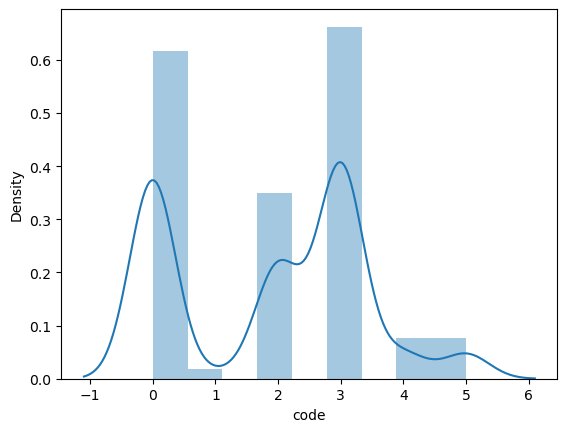

In [119]:
ax = sns.distplot(articles_full["code"])

Признак категориальный, нормального распределения нет, категории 0 и 3 завышены, похожи на выбросы

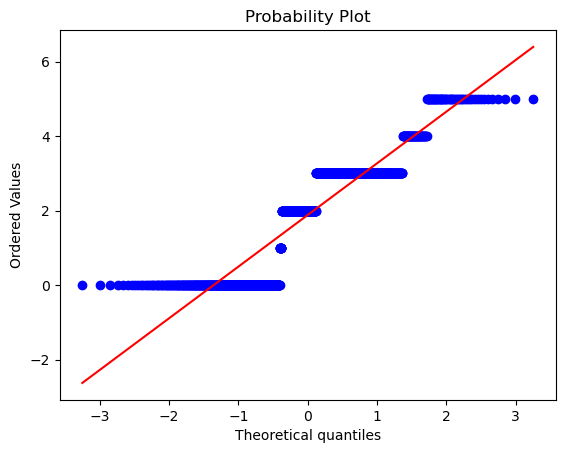

In [120]:
stats.probplot(articles_full["code"], dist="norm", plot=plt) 
plt.show()

Признак категориальный, не следую нормальное распределению

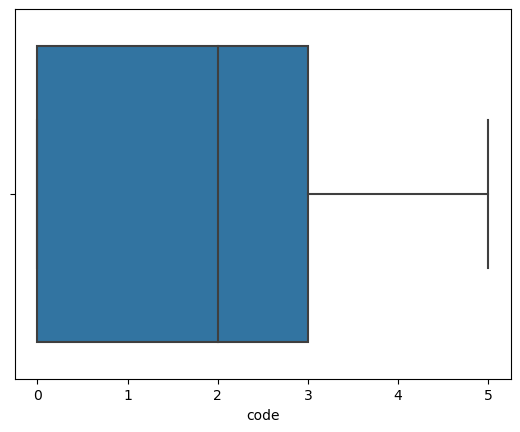

In [121]:
ax = sns.boxplot(x=articles_full["code"])

Ящик с усами скошен в лево, 3,4,5 кластеры малочисленно

### Тест Шапиро-Уилка

In [122]:
statistic_shapiro, p_value_shapiro = stats.shapiro(articles_full["code"])
print('Статистика теста:', statistic_shapiro)
print('p-значение:', p_value_shapiro)

Статистика теста: 0.8337891101837158

p-значение: 8.679579371758105e-34


### К-квадрат Д’Агостино

In [123]:
statistic_normaltest, p_value_normaltest = stats.normaltest(articles_full["code"])
print('Статистика теста:', statistic_normaltest)
print('p-значение:', p_value_normaltest)

Статистика теста: 581.6014996414875

p-значение: 5.091421117341899e-127


Математические расчеты показали, что действительно целевая переменная распределена не нормально, предположительно из-за того, что многие компании, простеленные в документе, прекратили свою деятельность, и их статей в открытом доступу оказалось очень мало

### Количественная оценка

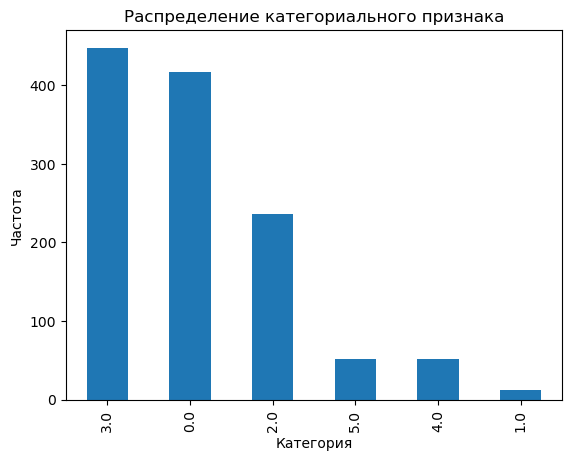

In [124]:
# Пример категориальных данных
data = articles_full["code"]

# Построение гистограммы
data.value_counts().plot(kind='bar')

# Настройка осей и заголовка
plt.xlabel('Категория')
plt.ylabel('Частота')
plt.title('Распределение категориального признака')

# Отображение графика
plt.show()

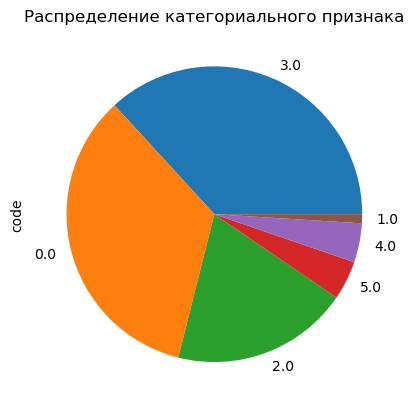

In [125]:
# Пример категориальных данных
data = articles_full["code"]

# Построение круговой диаграммы
data.value_counts().plot(kind='pie')

# Настройка заголовка
plt.title('Распределение категориального признака')

# Отображение графика
plt.show()

Количественная оценка категорий показала, что больше всего статей с номинацией 3(Наука, технологии и инновации), совсем мало статей номинацией 1(Игровая индустрия и киберспорт)

### Зависимость целевой переменной от месяца и дня публикации статьи

In [126]:
month = []
for i in tqdm(range(len(articles_full["date"]))):
    month.append(float(str(articles_full["date"][i])[4:]))

  0%|          | 0/1217 [00:00<?, ?it/s]

In [127]:
articles_full["month"] = month
articles_full

,name_company,text,date,description,activity,rating,part_speech,tfidf,vector,nominations,code,month
0,cybersport.metaratings,"[декабрь, состояться, церемония, награждение, ...",20211208,[пусто],[пусто],0,"[(именно, Неизвестно), (vinci, Неизвестно), (м...","{'номинация': 0.4378978809844386, 'проект': 0....","(0, 821)\t0.02189489404922193\n (0, 600)\t0...",Игровая индустрия и киберспорт,1.0,1208.0
1,esforce holding,"[декабрь, состояться, церемония, награждение, ...",20211208,[пусто],[пусто],0,"[(именно, Неизвестно), (vinci, Неизвестно), (м...","{'номинация': 0.4378978809844386, 'проект': 0....","(0, 821)\t0.02189489404922193\n (0, 600)\t0...",Игровая индустрия и киберспорт,1.0,1208.0
2,esforce holding,"[совместный, исследование, издатель, компьютер...",20210729,[пусто],[пусто],0,"[(склонный, Имя прилагательное (полное)), (дел...","{'игра': 0.19050019050028574, 'world': 0.15875...","(0, 426)\t0.031750031750047626\n (0, 649)\t...",Игровая индустрия и киберспорт,1.0,729.0
3,esforce holding,"[статистика, esports, observer, половина, год,...",20210709,[пусто],[пусто],0,"[(тактический, Имя прилагательное (полное)), (...","{'канал': 0.32795663669996916, 'dota': 0.14907...","(0, 352)\t0.0298142396999972\n (0, 145)\t0....",Игровая индустрия и киберспорт,1.0,709.0
4,esforce holding,"[компания, superdata, research, paypal, провес...",20210411,[пусто],[пусто],0,"[(большинство, Имя существительное), (именно, ...","{'киберспорт': 0.27443361224780893, 'миллион':...","(0, 81)\t0.022869467687317412\n (0, 68)\t0....",Игровая индустрия и киберспорт,1.0,411.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1212,цифровое образование,"[министерство, труд, социальноить, защита, рос...",20210811,[пусто],[пусто],0,"[(сбор, Имя существительное), (рынок, Имя суще...","{'цифровой': 0.3549253530262946, 'след': 0.236...","(0, 56)\t0.03943615033625495\n (0, 45)\t0.0...",Образование и Кадры,4.0,811.0
1213,цифровое образование,"[министр, просвещение, сергей, кравцов, доклад...",20210116,[пусто],[пусто],0,"[(пока, Наречие), (reactjs, Неизвестно), (дела...","{'сферум': 0.22703830459324992, 'образовательн...","(0, 8)\t0.045407660918649985\n (0, 227)\t0....",Образование и Кадры,4.0,116.0
1214,цифровое образование,"[великия, уравнитель, одной, команда, мочь, ра...",20211220,[пусто],[пусто],0,"[(лабораторный, Имя прилагательное (полное)), ...","{'образование': 0.3599744580998304, 'диплом': ...","(0, 1306)\t0.008371499025577453\n (0, 4013)...",Образование и Кадры,4.0,1220.0
1215,цифровое образование,"[сегодня, взять, рука, книжка, эндрю, таненбау...",20211114,[пусто],[пусто],0,"[(именно, Неизвестно), (упомянуть, Инфинитив),...","{'таненбаум': 0.22113289104342324, 'книга': 0....","(0, 96)\t0.022113289104342324\n (0, 760)\t0...",Образование и Кадры,4.0,1114.0


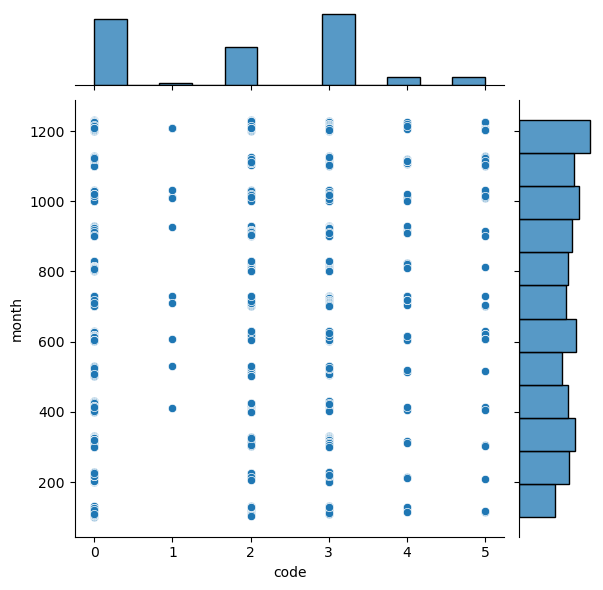

In [128]:
sns.jointplot(x='code', y='month', data=articles_full)

По сколько одних статей на порядок больше, чем других, нельзя сказать когда больше всего публикуется определённая номинация статей, но можно сказать, что в декабре и в июле публикуется самое большое количество статей

### Зависимость целевой переменной от рейтинга статьи

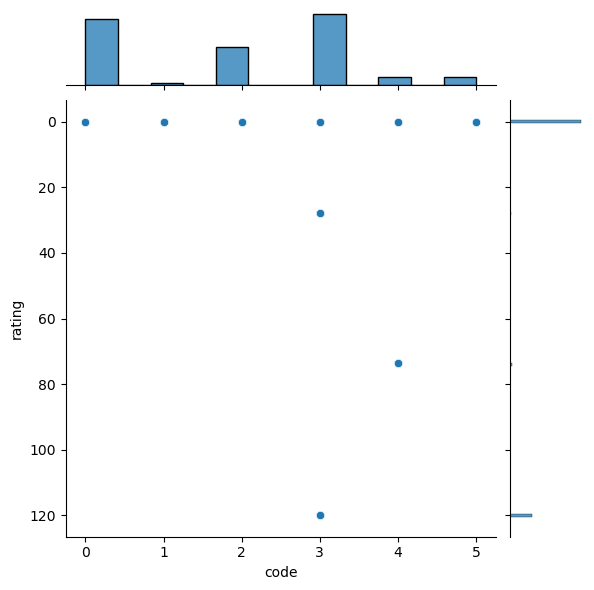

In [71]:
sns.jointplot(x='code', y='rating', data=articles_full)

Очень много заменено пустых значений на 0. Отсутствие данных не позволяет корректно оценить корреляцию признаков

### Зависимость целевой переменной от n-грамм

In [129]:
keywords_1 = []
for i in tqdm(range(len(articles_full["tfidf"]))):
    keywords_1.append(list(articles_full["tfidf"][i].keys())[0:1])

  0%|          | 0/1217 [00:00<?, ?it/s]

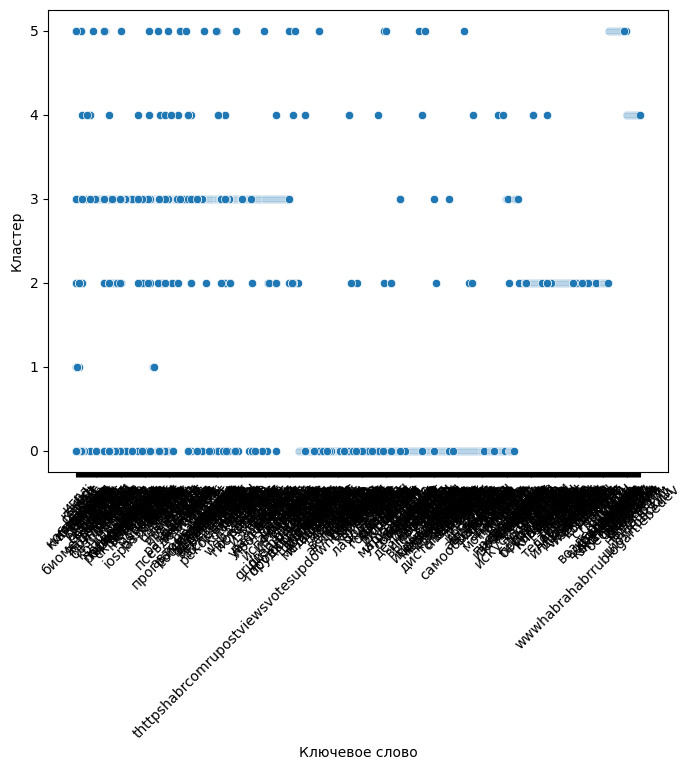

In [130]:
# Пример данных
topics = articles_full["code"]
keywords = keywords_1

# Создание датафрейма для визуализации
data = []
for i, topic in enumerate(topics):
    for keyword in keywords[i]:
        data.append([topic, keyword])
df = pd.DataFrame(data, columns=['Кластер', 'Ключевое слово'])

# Построение графика
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Ключевое слово', y='Кластер')

plt.xticks(rotation=45)

# Отображение графика
plt.show()


Больше статей больше ключевых слов добавлено

In [131]:
nominations_df

,name_company,nominations,code
0,здоровье.ру,Здоровье и медицина,0
1,проект по использованию технологий компьютерно...,Здоровье и медицина,0
2,skillbox,"Наука, технологии и инновации",3
3,gett,"Наука, технологии и инновации",3
4,промобот,"Наука, технологии и инновации",3
5,иннотех,"Наука, технологии и инновации",3
6,cybersport.metaratings,Игровая индустрия и киберспорт,1
7,mma.metaratings,Игровая индустрия и киберспорт,1
8,goose gaming,Игровая индустрия и киберспорт,1
9,esforce holding,Игровая индустрия и киберспорт,1


Для наглядности вывели номинации и их название

In [132]:
articles_full.to_csv("articles_full", encoding="utf-8-sig", index=False)
articles_full.to_pickle('articles_full_end.pkl')

# 1.6 Отчет о проделанной работе

   1) Парсинг doxc - получены 22 номинанта.
   2) Парсинг json файлов - из 14 файлов получены 1112 статей и информация о 2-х номинантах.
   3) Парсинг веб ресурса Habr -получены 575 статей тех компаний, что не предоставлены в файлах json, информация о 4-х номинантах, два из которых повторяться.
   4) Объединение dataframe - получены dataframe 1686 × 6, есть пустые значения, текст не обработан, сохранен файл  "статьи.csv".
   5) Формирование структуры набора данных
   5) Предварительный разведочный анализ - стало известно о большом количестве пропусков(72.91%) в столбцах: описания, сферы деятельности и рейтинга компании, о отсутствии информации о компании mma.metaratings
   7) Замена пустых значений - заменено 1314 значений в 3 колонках 
   8) Удаление стоп-слов, пунктуации, спецсимволов.
   9) Форматирование и Фильтрации даты - осталось 1217 статей
   10) Tокенизация
   11) Лемматизация и выделение значимых частей речи
   12) Проверка результатов - обнаружены и удалены стоп слова 
   13) Поиск ключевых слов/n-грамм. Векторизация текстов
   14) Bag of words, TF-IDF реализованы, а Word Embeddings - нет
   15) Векторизация текст, поиск ключевых n-грамм методом TF-IDF и включение признака в df
   16) Разведочный анализ, парсинг json, замена пустых значений построение графиков - распределение не нормальное, некоторых компаний на порядок больше чем других, где-то не хватает данных